# Merge a dataset through 2020 with audio feature metadata (importantly the genre), pull lyrics from dataset with pre-pulled lyrics through 2019, snag 2020 lyrics via genius API

In [1]:
import pandas as pd
import numpy as np
import json

from IPython.display import Markdown as md


In [2]:
np.__version__

'1.19.5'

## 1. Read in the list of songs

In [3]:
songs_df = pd.read_csv('./data/1 DONE RIGHT OUTPUT unique songs.csv')

In [4]:
songs_df

,song_id,chart_position,chart_debut,song,performer,artist_array,generic_genre
0,#9 DreamJohn Lennon,9,1974-12-21,#9 Dream,John Lennon,['John Lennon'],uncategorized
1,'03 Bonnie & ClydeJay-Z Featuring Beyonce Knowles,4,2002-10-26,'03 Bonnie & Clyde,Jay-Z Featuring Beyonce Knowles,"['Jay-Z', 'Beyonce Knowles']",rock
2,'65 Love AffairPaul Davis,6,1982-02-27,'65 Love Affair,Paul Davis,['Paul Davis'],hip hop
3,('til) I Kissed YouThe Everly Brothers,4,1959-08-15,('til) I Kissed You,The Everly Brothers,['The Everly Brothers'],country
4,(Can't Live Without Your) Love And AffectionNe...,1,1990-07-07,(Can't Live Without Your) Love And Affection,Nelson,['Nelson'],uncategorized
...,...,...,...,...,...,...,...
5061,everything i wantedBillie Eilish,8,2019-11-23,everything i wanted,Billie Eilish,['Billie Eilish'],folk
5062,iSpyKYLE Featuring Lil Yachty,4,2017-01-14,iSpy,KYLE Featuring Lil Yachty,"['KYLE', 'Lil Yachty']",pop
5063,interludeJ. Cole,8,2021-05-22,interlude,J. Cole,['J. Cole'],NaN
5064,"my.lifeJ. Cole, 21 Savage & Morray",2,2021-05-29,my.life,"J. Cole, 21 Savage & Morray","['J. Cole', '21 Savage', 'Morray']",NaN


# 2. (DO ONCE, now commented out) Fetch Lyrics for 2020 from genius.com API, along with URLs (which help signal errors)

### Setup

In [49]:
import lyricsgenius
GENIUS_CLIEN_API_KEY = '8ZiCNVQqbSF6NM0nwVnVv6Y0EBR7BsVQ9HaVgPdqJOZR1l6XlymR-pUUi6z3GHPx' # be nice :)
genius = lyricsgenius.Genius(GENIUS_CLIEN_API_KEY)

In [7]:
def get_lyrics(title='', artist=''):
    try:
        return genius.search_song(title, artist).lyrics
    except:
        print('not found: ${title}')

## Fetch lyrics, and stash URLs

In [8]:
BANNED_CHARACTERS = ['[', ']', '"', "'", '+', ',', '.', '(', ')']
def clean_it(s):
    cleaned = s
    for naughty_char in BANNED_CHARACTERS:
        cleaned = cleaned.replace(naughty_char, '')
    return cleaned.strip()

dirty = 'Whole Wide World (From "True Love"'
clean_it(dirty)

'Whole Wide World From True Love'

In [41]:
def search_song_chose_first_then_get_lyrics(song, performer):
    try: 
        print(f'{performer} {song}')
        songs = genius.search_songs(clean_it(f'{performer} {song}'))
        urls = [song['result']['url'] for song in songs['hits']]
        
        return [genius.lyrics(song_url=urls[0]), urls]
    except:
        print(f'OOPS: {performer} {song}')

In [10]:
# fetched_lyrics_and_url_options_arrays = songs_df.apply(
#     lambda row: search_song_chose_first_then_get_lyrics(song=row['song'], performer=row['performer']),
#     axis=1
# )

In [11]:
# just_lyrics = [x and x[0] for x in fetched_lyrics_and_url_options_arrays]
# just_stringified_urls = [x and json.dumps(x[1]) for x in fetched_lyrics_and_url_options_arrays]
# save_to_disk = pd.DataFrame({
#     'song_id': songs_df.song_id, 'lyrics': just_lyrics, 'urls': just_stringified_urls
# })

# save_to_disk.to_csv('./data/Lyrics from Lyric Genius API with URLS and non-matches left null (take 2).csv', index=False)
# save_to_disk


# 3. Load up saved fetched lyrics, merge

In [12]:
stashed_fetched_lyrics_with_url = pd.read_csv('./data/Lyrics from Lyric Genius API with URLS and non-matches left null (take 2).csv')

stashed_fetched_lyrics_with_url


,song_id,lyrics,urls
0,#9 DreamJohn Lennon,#9 Dream Lyrics[Verse 1]\nSo long ago\nWas it ...,"[""https://genius.com/John-lennon-9-dream-lyric..."
1,'03 Bonnie & ClydeJay-Z Featuring Beyonce Knowles,"’03 Bonnie & Clyde Lyrics[Intro: JAY-Z]\nUhh, ...","[""https://genius.com/Jay-z-03-bonnie-and-clyde..."
2,'65 Love AffairPaul Davis,’65 Love Affair LyricsI was a car hop\nYou wer...,"[""https://genius.com/Paul-davis-65-love-affair..."
3,('til) I Kissed YouThe Everly Brothers,(’Til) I Kissed You Lyrics[Verse]\nNever felt ...,"[""https://genius.com/The-everly-brothers-til-i..."
4,(Can't Live Without Your) Love And AffectionNe...,(Can’t Live Without Your) Love And Affection L...,"[""https://genius.com/Nelson-cant-live-without-..."
...,...,...,...
5061,everything i wantedBillie Eilish,NaN,NaN
5062,iSpyKYLE Featuring Lil Yachty,"I Spy, T Shirt, Isn’t She Lovely, & Swang Mash...","[""https://genius.com/Alex-aiono-i-spy-t-shirt-..."
5063,interludeJ. Cole,"Interlude (Cole World) LyricsI'm drivin', nigg...","[""https://genius.com/J-cole-interlude-cole-wor..."
5064,"my.lifeJ. Cole, 21 Savage & Morray",TranslationsРусскийPortuguêsDeutschItaliano​​m...,"[""https://genius.com/J-cole-21-savage-and-morr..."


In [13]:
merged_with_lyrics_RAW = pd.merge(
    left=songs_df, 
    left_on='song_id', 
    right=stashed_fetched_lyrics_with_url, 
    right_on='song_id'
)

merged_with_lyrics_RAW['fetched_url'] =  merged_with_lyrics_RAW.urls.apply(
    lambda stringified_array: pd.notna(stringified_array) and json.loads(stringified_array)[0]

)
merged_with_lyrics_RAW

,song_id,chart_position,chart_debut,song,performer,artist_array,generic_genre,lyrics,urls,fetched_url
0,#9 DreamJohn Lennon,9,1974-12-21,#9 Dream,John Lennon,['John Lennon'],uncategorized,#9 Dream Lyrics[Verse 1]\nSo long ago\nWas it ...,"[""https://genius.com/John-lennon-9-dream-lyric...",https://genius.com/John-lennon-9-dream-lyrics
1,'03 Bonnie & ClydeJay-Z Featuring Beyonce Knowles,4,2002-10-26,'03 Bonnie & Clyde,Jay-Z Featuring Beyonce Knowles,"['Jay-Z', 'Beyonce Knowles']",rock,"’03 Bonnie & Clyde Lyrics[Intro: JAY-Z]\nUhh, ...","[""https://genius.com/Jay-z-03-bonnie-and-clyde...",https://genius.com/Jay-z-03-bonnie-and-clyde-l...
2,'65 Love AffairPaul Davis,6,1982-02-27,'65 Love Affair,Paul Davis,['Paul Davis'],hip hop,’65 Love Affair LyricsI was a car hop\nYou wer...,"[""https://genius.com/Paul-davis-65-love-affair...",https://genius.com/Paul-davis-65-love-affair-l...
3,('til) I Kissed YouThe Everly Brothers,4,1959-08-15,('til) I Kissed You,The Everly Brothers,['The Everly Brothers'],country,(’Til) I Kissed You Lyrics[Verse]\nNever felt ...,"[""https://genius.com/The-everly-brothers-til-i...",https://genius.com/The-everly-brothers-til-i-k...
4,(Can't Live Without Your) Love And AffectionNe...,1,1990-07-07,(Can't Live Without Your) Love And Affection,Nelson,['Nelson'],uncategorized,(Can’t Live Without Your) Love And Affection L...,"[""https://genius.com/Nelson-cant-live-without-...",https://genius.com/Nelson-cant-live-without-yo...
...,...,...,...,...,...,...,...,...,...,...
5061,everything i wantedBillie Eilish,8,2019-11-23,everything i wanted,Billie Eilish,['Billie Eilish'],folk,NaN,NaN,False
5062,iSpyKYLE Featuring Lil Yachty,4,2017-01-14,iSpy,KYLE Featuring Lil Yachty,"['KYLE', 'Lil Yachty']",pop,"I Spy, T Shirt, Isn’t She Lovely, & Swang Mash...","[""https://genius.com/Alex-aiono-i-spy-t-shirt-...",https://genius.com/Alex-aiono-i-spy-t-shirt-is...
5063,interludeJ. Cole,8,2021-05-22,interlude,J. Cole,['J. Cole'],NaN,"Interlude (Cole World) LyricsI'm drivin', nigg...","[""https://genius.com/J-cole-interlude-cole-wor...",https://genius.com/J-cole-interlude-cole-world...
5064,"my.lifeJ. Cole, 21 Savage & Morray",2,2021-05-29,my.life,"J. Cole, 21 Savage & Morray","['J. Cole', '21 Savage', 'Morray']",NaN,TranslationsРусскийPortuguêsDeutschItaliano​​m...,"[""https://genius.com/J-cole-21-savage-and-morr...",https://genius.com/J-cole-21-savage-and-morray...


# 2.  Assess any further fixes needed

## Lyrics that failed to fetch even URLs

In [38]:
# Failed to even get urls
even_url_fetch_failed = merged_with_lyrics_RAW[
    merged_with_lyrics_RAW.urls.isna()
]
even_url_fetch_failed

,song_id,chart_position,chart_debut,song,performer,artist_array,generic_genre,lyrics,urls,fetched_url
11,(I Can't Get No) SatisfactionThe Rolling Stones,1,1965-06-12,(I Can't Get No) Satisfaction,The Rolling Stones,['The Rolling Stones'],rock,NaN,NaN,False
12,(I Just) Died In Your ArmsCutting Crew,1,1987-03-07,(I Just) Died In Your Arms,Cutting Crew,['Cutting Crew'],rock,NaN,NaN,False
14,(I Know) I'm Losing YouThe Temptations,8,1966-11-19,(I Know) I'm Losing You,The Temptations,['The Temptations'],hip hop,NaN,NaN,False
15,(I've Had) The Time Of My LifeBill Medley & Je...,1,1987-09-26,(I've Had) The Time Of My Life,Bill Medley & Jennifer Warnes,"['Bill Medley', 'Jennifer Warnes']",rock,NaN,NaN,False
25,(Now and Then There's) A Fool Such As IElvis P...,2,1959-03-21,(Now and Then There's) A Fool Such As I,Elvis Presley With The Jordanaires,['Elvis Presley With The Jordanaires'],pop,NaN,NaN,False
...,...,...,...,...,...,...,...,...,...,...
5046,Youngblood5 Seconds Of Summer,7,2018-06-16,Youngblood,5 Seconds Of Summer,['5 Seconds Of Summer'],rock,NaN,NaN,False
5048,Your LoveThe Outfield,6,1986-02-15,Your Love,The Outfield,['The Outfield'],NaN,NaN,NaN,False
5056,YummyJustin Bieber,2,2020-01-18,Yummy,Justin Bieber,['Justin Bieber'],country,NaN,NaN,False
5061,everything i wantedBillie Eilish,8,2019-11-23,everything i wanted,Billie Eilish,['Billie Eilish'],folk,NaN,NaN,False


### Just try refetching :P 

In [42]:
fetched_lyrics__even_url_fetch_failed = even_url_fetch_failed.apply(
    lambda row: search_song_chose_first_then_get_lyrics(song=row['song'], performer=row['performer']),
    axis=1
)

The Rolling Stones (I Can't Get No) Satisfaction
Cutting Crew (I Just) Died In Your Arms
The Temptations (I Know) I'm Losing You
Bill Medley & Jennifer Warnes (I've Had) The Time Of My Life
Elvis Presley With The Jordanaires (Now and Then There's) A Fool Such As I
OOPS: Elvis Presley With The Jordanaires (Now and Then There's) A Fool Such As I
Otis Redding (Sittin' On) The Dock Of The Bay
OOPS: Otis Redding (Sittin' On) The Dock Of The Bay
Beastie Boys (You Gotta) Fight For Your Right (To Party!)
OOPS: Beastie Boys (You Gotta) Fight For Your Right (To Party!)
Elvis Presley With The Jordanaires (You're the) Devil In Disguise
OOPS: Elvis Presley With The Jordanaires (You're the) Devil In Disguise
Britney Spears ...Baby One More Time
OOPS: Britney Spears ...Baby One More Time
Amerie 1 Thing
50 Cent Featuring Nate Dogg 21 Questions
Bruno Mars 24K Magic
OOPS: Bruno Mars 24K Magic
Chicago 25 Or 6 To 4
OOPS: Chicago 25 Or 6 To 4
Ariana Grande 34+35
Lukas Graham 7 Years
Dolly Parton 9 To 5
OOP

Ginuwine Differences
OOPS: Ginuwine Differences
Christina Milian Dip It Low
Jason Aldean Dirt Road Anthem
Michael Jackson Dirty Diana
B.T. Express Do It ('til You're Satisfied)
OOPS: B.T. Express Do It ('til You're Satisfied)
Culture Club Do You Really Want To Hurt Me
Chicago Does Anybody Really Know What Time It Is?
Lonnie Donegan And His Skiffle Group Does Your Chewing Gum Lose It's Flavor (On The Bedpost Over Night)
OOPS: Lonnie Donegan And His Skiffle Group Does Your Chewing Gum Lose It's Flavor (On The Bedpost Over Night)
Jessie J Domino
Cheap Trick Don't Be Cruel
Electric Light Orchestra Don't Bring Me Down
OOPS: Electric Light Orchestra Don't Bring Me Down
Sugarloaf/Jerry Corbetta Don't Call Us, We'll Call You
OOPS: Sugarloaf/Jerry Corbetta Don't Call Us, We'll Call You
Elvis Presley Don't Cry Daddy/Rubberneckin'
OOPS: Elvis Presley Don't Cry Daddy/Rubberneckin'
Crowded House Don't Dream It's Over
OOPS: Crowded House Don't Dream It's Over
David Soul Don't Give Up On Us
Crystal G

Duran Duran Hungry Like The Wolf
Paul Revere & The Raiders Featuring Mark Lindsay Hungry
Donovan Hurdy Gurdy Man
Kanye West Hurricane
OOPS: Kanye West Hurricane
Linda Ronstadt Hurt So Bad
Little Anthony And The Imperials Hurt So Bad
Timi Yuro Hurt
Carpenters Hurting Each Other
John Cougar Hurts So Good
Patti Page Hush, Hush, Sweet Charlotte
Deep Purple Hush
The Notorious B.I.G. Hypnotize
OOPS: The Notorious B.I.G. Hypnotize
Def Leppard Hysteria
Color Me Badd I Adore Mi Amor
OneRepublic I Ain't Worried
Simon & Garfunkel I Am A Rock
Helen Reddy I Am Woman
Neil Diamond I Am...I Said/Done Too Soon
R. Kelly I Believe I Can Fly (From "Space Jam")
Whitney Houston I Believe In You And Me (From "The Preacher's Wife")
Blessid Union Of Souls I Believe
Fantasia I Believe
Rome I Belong To You (Every Time I See Your Face)
Dan Hartman I Can Dream About You
Billy Swan I Can Help
All-4-One I Can Love You Like That
The Shangri-Las I Can Never Go Home Anymore
Johnny Nash I Can See Clearly Now
OOPS: Johnn

OOPS: Meat Loaf I'd Do Anything For Love (But I Won't Do That)
The Spinners I'll Be Around
Jackson 5 I'll Be There
OOPS: Jackson 5 I'll Be There
Boyz II Men I'll Make Love To You
The Partridge Family Starring Shirley Jones Featuring David Cassidy I'll Meet You Halfway
OOPS: The Partridge Family Starring Shirley Jones Featuring David Cassidy I'll Meet You Halfway
The Staple Singers I'll Take You There
OOPS: The Staple Singers I'll Take You There
Diana Ross I'm Coming Out
OOPS: Diana Ross I'm Coming Out
The Proclaimers I'm Gonna Be (500 Miles)
Barry White I'm Gonna Love You Just A Little More Baby
OOPS: Barry White I'm Gonna Love You Just A Little More Baby
Diana Ross And The Supremes & The Temptations I'm Gonna Make You Love Me
OOPS: Diana Ross And The Supremes & The Temptations I'm Gonna Make You Love Me
Sam Smith I'm Not The Only One
OOPS: Sam Smith I'm Not The Only One
The Pointer Sisters I'm So Excited
OOPS: The Pointer Sisters I'm So Excited
B.J. Thomas And The Triumphs I'm So Lone

OOPS: Bobby Brown On Our Own (From "Ghostbusters II")
Joan Osborne One Of Us
OOPS: Joan Osborne One Of Us
The Fixx One Thing Leads To Another
Rihanna Only Girl (In The World)
OOPS: Rihanna Only Girl (In The World)
Britney Spears Oops!...I Did It Again
OOPS: Britney Spears Oops!...I Did It Again
Madness Our House
Daryl Hall John Oates Out Of Touch
OOPS: Daryl Hall John Oates Out Of Touch
The Rolling Stones Paint It, Black
Desiigner Panda
OOPS: Desiigner Panda
Lil Nas X Panini
The Temptations Papa Was A Rollin' Stone
OOPS: The Temptations Papa Was A Rollin' Stone
Lady Gaga Paparazzi
M.I.A. Paper Planes
OOPS: M.I.A. Paper Planes
The Beatles Paperback Writer
Eddie Murphy Party All The Time
LMFAO Featuring Lauren Bennett & GoonRock Party Rock Anthem
OOPS: LMFAO Featuring Lauren Bennett & GoonRock Party Rock Anthem
Perez Prado And His Orchestra Patricia
OOPS: Perez Prado And His Orchestra Patricia
Billy Joe & The Checkmates Percolator (Twist)
OOPS: Billy Joe & The Checkmates Percolator (Twis

OOPS: The Weeknd The Hills
Bruno Mars The Lazy Song
Little Eva The Loco-Motion
OOPS: Little Eva The Loco-Motion
Roxette The Look
Jimmy Eat World The Middle
Zedd, Maren Morris & Grey The Middle
OOPS: Zedd, Maren Morris & Grey The Middle
Charlie Rich The Most Beautiful Girl
OOPS: Charlie Rich The Most Beautiful Girl
R.E.M. The One I Love
Huey Lewis & The News The Power Of Love
OOPS: Huey Lewis & The News The Power Of Love
Snap! The Power
OOPS: Snap! The Power
Eminem The Real Slim Shady
Hoobastank The Reason
Bette Midler The Rose
Simon & Garfunkel The Sound Of Silence
OOPS: Simon & Garfunkel The Sound Of Silence
Smokey Robinson & The Miracles The Tears Of A Clown
OOPS: Smokey Robinson & The Miracles The Tears Of A Clown
10cc The Things We Do For Love
The Black Eyed Peas The Time (Dirty Bit)
Bruce Hornsby & The Range The Way It Is
OOPS: Bruce Hornsby & The Range The Way It Is
Michael Jackson The Way You Make Me Feel
ABBA The Winner Takes It All
Isaac Hayes Theme From Shaft
OOPS: Isaac Haye

In [48]:
def convert_fetched_lyrics_to_df(fetched_lyrics_and_url_options_arrays, original_df):
    just_lyrics = [x and x[0] for x in fetched_lyrics_and_url_options_arrays]
    just_stringified_urls = [x and json.dumps(x[1]) for x in fetched_lyrics_and_url_options_arrays]
    save_to_disk = pd.DataFrame({
        'song_id': original_df.song_id, 'lyrics': just_lyrics, 'urls': just_stringified_urls
    })
    return save_to_disk

save_to_disk = convert_fetched_lyrics_to_df(fetched_lyrics__even_url_fetch_failed, even_url_fetch_failed)
save_to_disk.to_csv('./data/Lyrics from Lyric Genius API with URLS and non-matches left null (take 2) REFETCH OF FAILED.csv', index=False)
save_to_disk


,song_id,lyrics,urls
11,(I Can't Get No) SatisfactionThe Rolling Stones,(I Can’t Get No) Satisfaction Lyrics[Instrumen...,"[""https://genius.com/The-rolling-stones-i-cant..."
12,(I Just) Died In Your ArmsCutting Crew,(I Just) Died in Your Arms Lyrics[Intro]\nOh I...,"[""https://genius.com/Cutting-crew-i-just-died-..."
14,(I Know) I'm Losing YouThe Temptations,(I Know) I’m Losing You Lyrics[Intro]\nOoh\nYo...,"[""https://genius.com/The-temptations-i-know-im..."
15,(I've Had) The Time Of My LifeBill Medley & Je...,(I’ve Had) The Time of My Life Lyrics[Chorus: ...,"[""https://genius.com/Bill-medley-and-jennifer-..."
25,(Now and Then There's) A Fool Such As IElvis P...,None,None
...,...,...,...
5046,Youngblood5 Seconds Of Summer,None,None
5048,Your LoveThe Outfield,None,None
5056,YummyJustin Bieber,None,None
5061,everything i wantedBillie Eilish,TranslationsTürkçeBillie Eilish - everything i...,"[""https://genius.com/Billie-eilish-everything-..."


## 3. has nothing

In [43]:
fetched_lyrics__even_url_fetch_failed

11      [(I Can’t Get No) Satisfaction Lyrics[Instrume...
12      [(I Just) Died in Your Arms Lyrics[Intro]\nOh ...
14      [(I Know) I’m Losing You Lyrics[Intro]\nOoh\nY...
15      [(I’ve Had) The Time of My Life Lyrics[Chorus:...
25                                                   None
                              ...                        
5046                                                 None
5048                                                 None
5056                                                 None
5061    [TranslationsTürkçeBillie Eilish - everything ...
5065                                                 None
Length: 915, dtype: object

## Lyrics that got URLs, but failed to retrieve lyrics using them

In [15]:
# Got urls, but not lyrics
merged_with_lyrics_RAW[
    merged_with_lyrics_RAW.lyrics.isna() &
    merged_with_lyrics_RAW.urls.notna()
]

,song_id,chart_position,chart_debut,song,performer,artist_array,generic_genre,lyrics,urls,fetched_url
89,95.southJ. Cole,8,2021-05-29,95.south,J. Cole,['J. Cole'],NaN,NaN,"[""https://genius.com/8-bit-arcade-95-south-8-b...",https://genius.com/8-bit-arcade-95-south-8-bit...
100,A Fifth Of BeethovenWalter Murphy & The Big Ap...,1,1976-05-29,A Fifth Of Beethoven,Walter Murphy & The Big Apple Band,"['Walter Murphy', 'The Big Apple Band']",pop,NaN,"[""https://genius.com/Walter-murphy-a-fifth-of-...",https://genius.com/Walter-murphy-a-fifth-of-be...
304,Axel FHarold Faltermeyer,3,1985-03-30,Axel F,Harold Faltermeyer,['Harold Faltermeyer'],rock,NaN,"[""https://genius.com/Harold-faltermeyer-axel-f...",https://genius.com/Harold-faltermeyer-axel-f-l...
631,Can't Hold UsMacklemore & Ryan Lewis Featuring...,1,2013-02-16,Can't Hold Us,Macklemore & Ryan Lewis Featuring Ray Dalton,"['Macklemore', 'Ryan Lewis', 'Ray Dalton']",uncategorized,NaN,"[""https://genius.com/Cant-hold-us-cant-hold-us...",https://genius.com/Cant-hold-us-cant-hold-us-t...
719,Classical GasMason Williams,2,1968-06-22,Classical Gas,Mason Williams,['Mason Williams'],NaN,NaN,"[""https://genius.com/Mason-williams-classical-...",https://genius.com/Mason-williams-classical-ga...
939,Disco Duck (Part I)Rick Dees & His Cast Of Idiots,1,1976-08-14,Disco Duck (Part I),Rick Dees & His Cast Of Idiots,"['Rick Dees', 'His Cast Of Idiots']",electro,NaN,"[""https://genius.com/Rick-dees-and-his-cast-of...",https://genius.com/Rick-dees-and-his-cast-of-i...
1200,ExodusFerrante & Teicher,2,1960-11-12,Exodus,Ferrante & Teicher,"['Ferrante', 'Teicher']",hip hop,NaN,"[""https://genius.com/Ferrante-and-teicher-exod...",https://genius.com/Ferrante-and-teicher-exodus...
1244,Feels So GoodChuck Mangione,4,1978-02-11,Feels So Good,Chuck Mangione,['Chuck Mangione'],NaN,NaN,"[""https://genius.com/Chuck-mangione-feels-so-g...",https://genius.com/Chuck-mangione-feels-so-goo...
1497,Grazing In The GrassHugh Masekela,1,1968-06-08,Grazing In The Grass,Hugh Masekela,['Hugh Masekela'],folk,NaN,"[""https://genius.com/Hugh-masekela-grazing-in-...",https://genius.com/Hugh-masekela-grazing-in-th...
1533,Hang 'Em HighBooker T. & The MG's,9,1968-11-09,Hang 'Em High,Booker T. & The MG's,"['Booker T.', ""The MG's""]",hip hop,NaN,"[""https://genius.com/Booker-t-and-the-mgs-hang...",https://genius.com/Booker-t-and-the-mgs-hang-e...


## Lyrics that fetched but are probably incorrect

### don't end in `-lyrics`

In [16]:
merged_with_lyrics_RAW[
    merged_with_lyrics_RAW.lyrics.notna() &
    ~merged_with_lyrics_RAW.fetched_url.apply(lambda url: url and url.endswith('-lyrics'))
]

,song_id,chart_position,chart_debut,song,performer,artist_array,generic_genre,lyrics,urls,fetched_url
42,(You're) Having My BabyPaul Anka with Odia Coates,1,1974-07-06,(You're) Having My Baby,Paul Anka with Odia Coates,['Paul Anka with Odia Coates'],hip hop,Angela’s Ashes LyricsAngela's Ashes\n\nA Memoi...,"[""https://genius.com/Frank-mccourt-angelas-ash...",https://genius.com/Frank-mccourt-angelas-ashes...
55,1-800-273-8255Logic Featuring Alessia Cara & K...,3,2017-05-20,1-800-273-8255,Logic Featuring Alessia Cara & Khalid,"['Logic', 'Alessia Cara', 'Khalid']",NaN,"Favorite Cover Songs Lyrics-#-- ""1-800-273-825...","[""https://genius.com/Goodapolloiv-favorite-cov...",https://genius.com/Goodapolloiv-favorite-cover...
70,34+35Ariana Grande Feat. Doja Cat & Megan Thee...,2,2021-01-02,34+35,Ariana Grande Feat. Doja Cat & Megan Thee Stal...,"['Ariana Grande Feat. Doja Cat', 'Megan Thee S...",uncategorized,Doja Cat [Discography List] LyricsStudio Album...,"[""https://genius.com/Doja-cat-doja-cat-discogr...",https://genius.com/Doja-cat-doja-cat-discograp...
77,6 Foot 7 FootLil Wayne Featuring Cory Gunz,9,2011-01-01,6 Foot 7 Foot,Lil Wayne Featuring Cory Gunz,"['Lil Wayne', 'Cory Gunz']",uncategorized,Best lines/bars of the 2010's Lyrics Englishha...,"[""https://genius.com/Genius-users-best-lines-b...",https://genius.com/Genius-users-best-lines-bar...
78,679Fetty Wap Featuring Remy Boyz,4,2015-07-18,679,Fetty Wap Featuring Remy Boyz,"['Fetty Wap', 'Remy Boyz']",pop,New Music Tuesday 06/30/15 LyricsRefused - Ser...,"[""https://genius.com/Spotify-new-music-tuesday...",https://genius.com/Spotify-new-music-tuesday-0...
...,...,...,...,...,...,...,...,...,...,...
4937,You Are So Beautiful/It's A Sin When You Love ...,5,1975-01-11,You Are So Beautiful/It's A Sin When You Love ...,Joe Cocker,['Joe Cocker'],country,Angela’s Ashes LyricsAngela's Ashes\n\nA Memoi...,"[""https://genius.com/Frank-mccourt-angelas-ash...",https://genius.com/Frank-mccourt-angelas-ashes...
4977,You Learn/You Oughta KnowAlanis Morissette,6,1996-07-27,You Learn/You Oughta Know,Alanis Morissette,['Alanis Morissette'],pop,Spotify Singles: Complete Collection LyricsThe...,"[""https://genius.com/Spotify-spotify-singles-c...",https://genius.com/Spotify-spotify-singles-com...
5016,You're Makin' Me High/Let It FlowToni Braxton,1,1996-06-08,You're Makin' Me High/Let It Flow,Toni Braxton,['Toni Braxton'],NaN,Toni Braxton’s 25 Best Songs: Critic’s Picks L...,"[""https://genius.com/Billboard-toni-braxtons-2...",https://genius.com/Billboard-toni-braxtons-25-...
5040,Young ForeverJay-Z + Mr. Hudson,10,2009-09-26,Young Forever,Jay-Z + Mr. Hudson,['Jay-Z + Mr. Hudson'],country,Die liebsten Closing-Tracks der Community Lyri...,"[""https://genius.com/Genius-deutschland-die-li...",https://genius.com/Genius-deutschland-die-lieb...


### TODO: determine more ways of sniffing out bad lyrics. 

stuff to look at:
- url is really different from song name / title (ie no overlap in words)

should be in the form

`/https://genius.com/Billy-joel-modern-woman-lyrics`

`/{artist}-{title}-lyrics`

When you have the wrong lyrics, the URL is usually pretty obviously wrong.

- song/artist has non standard characters that cause problems
- multiple artists listed made search fail

In [17]:
# it's no longer "raw" after all the fixes that are to come :)

merged_with_lyrics = merged_with_lyrics_RAW

# 3. LET ME SHOW YOU WHERE A LOT OF PROBLEMS LIE... *beckons wit finger solemnly*

## 1. Identify problem lyrics via irregular lyric & line length. *Spoiler*: it seems that non-alphabet characters are a big cause of errors

In [18]:
merged_with_lyrics.lyrics.str.len().describe()

count      4097.000000
mean       5567.876007
std       37145.693792
min          84.000000
25%        1140.000000
50%        1584.000000
75%        2289.000000
max      761414.000000
Name: lyrics, dtype: float64

Context: "modern woman" song is 2601 chars

<AxesSubplot:>

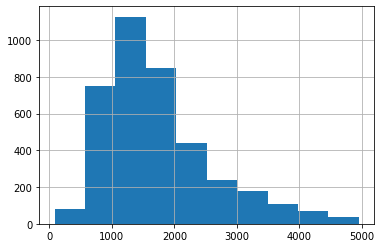

In [19]:
merged_with_lyrics[
    merged_with_lyrics.lyrics.str.len() < 5000
].lyrics.str.len().hist()

### Using *super long lyrics* (which are typicaly wrong) as a proxy for wrong-ness, we see they all contain non standard characters like `( \ +  ' .` (and maybe `numbers`?!). We need to strip them & refetch. 

In [20]:
merged_with_lyrics[
    merged_with_lyrics.lyrics.str.len() > 5000
]#.lyrics.str.len().hist()

,song_id,chart_position,chart_debut,song,performer,artist_array,generic_genre,lyrics,urls,fetched_url
10,(Hot S**t) Country GrammarNelly,7,2000-04-29,(Hot S**t) Country Grammar,Nelly,['Nelly'],rock,Hot Rap Songs Chart 25th Anniversary: Top 100 ...,"[""https://genius.com/Billboard-hot-rap-songs-c...",https://genius.com/Billboard-hot-rap-songs-cha...
42,(You're) Having My BabyPaul Anka with Odia Coates,1,1974-07-06,(You're) Having My Baby,Paul Anka with Odia Coates,['Paul Anka with Odia Coates'],hip hop,Angela’s Ashes LyricsAngela's Ashes\n\nA Memoi...,"[""https://genius.com/Frank-mccourt-angelas-ash...",https://genius.com/Frank-mccourt-angelas-ashes...
55,1-800-273-8255Logic Featuring Alessia Cara & K...,3,2017-05-20,1-800-273-8255,Logic Featuring Alessia Cara & Khalid,"['Logic', 'Alessia Cara', 'Khalid']",NaN,"Favorite Cover Songs Lyrics-#-- ""1-800-273-825...","[""https://genius.com/Goodapolloiv-favorite-cov...",https://genius.com/Goodapolloiv-favorite-cover...
70,34+35Ariana Grande Feat. Doja Cat & Megan Thee...,2,2021-01-02,34+35,Ariana Grande Feat. Doja Cat & Megan Thee Stal...,"['Ariana Grande Feat. Doja Cat', 'Megan Thee S...",uncategorized,Doja Cat [Discography List] LyricsStudio Album...,"[""https://genius.com/Doja-cat-doja-cat-discogr...",https://genius.com/Doja-cat-doja-cat-discograp...
148,"After All (Love Theme From ""Chances Are"")Cher ...",6,1989-03-11,"After All (Love Theme From ""Chances Are"")",Cher & Peter Cetera,"['Cher', 'Peter Cetera']",uncategorized,Essays of Michel de Montaigne (Chap. 2.12) Lyr...,"[""https://genius.com/Michel-de-montaigne-essay...",https://genius.com/Michel-de-montaigne-essays-...
...,...,...,...,...,...,...,...,...,...,...
4926,YogiThe Ivy Three,8,1960-08-06,Yogi,The Ivy Three,['The Ivy Three'],rock,Three Headed Dragon Lyrics[Verse 1 - YomiShiou...,"[""https://genius.com/Yomishious-three-headed-d...",https://genius.com/Yomishious-three-headed-dra...
4937,You Are So Beautiful/It's A Sin When You Love ...,5,1975-01-11,You Are So Beautiful/It's A Sin When You Love ...,Joe Cocker,['Joe Cocker'],country,Angela’s Ashes LyricsAngela's Ashes\n\nA Memoi...,"[""https://genius.com/Frank-mccourt-angelas-ash...",https://genius.com/Frank-mccourt-angelas-ashes...
4977,You Learn/You Oughta KnowAlanis Morissette,6,1996-07-27,You Learn/You Oughta Know,Alanis Morissette,['Alanis Morissette'],pop,Spotify Singles: Complete Collection LyricsThe...,"[""https://genius.com/Spotify-spotify-singles-c...",https://genius.com/Spotify-spotify-singles-com...
5016,You're Makin' Me High/Let It FlowToni Braxton,1,1996-06-08,You're Makin' Me High/Let It Flow,Toni Braxton,['Toni Braxton'],NaN,Toni Braxton’s 25 Best Songs: Critic’s Picks L...,"[""https://genius.com/Billboard-toni-braxtons-2...",https://genius.com/Billboard-toni-braxtons-25-...


### ... which is why Destiny`'`s child got messed up: they have a `'` in their band name

In [21]:
merged_with_lyrics[
    merged_with_lyrics.performer.str.contains("'")
]#.lyrics.str.len().hist()

,song_id,chart_position,chart_debut,song,performer,artist_array,generic_genre,lyrics,urls,fetched_url
8,(God Must Have Spent) A Little More Time On Yo...,8,1998-12-05,(God Must Have Spent) A Little More Time On You,'N Sync,"[""'N Sync""]",country,(God Must Have Spent) A Little More Time on Yo...,"[""https://genius.com/Nsync-god-must-have-spent...",https://genius.com/Nsync-god-must-have-spent-a...
116,A Must To AvoidHerman's Hermits,8,1965-12-25,A Must To Avoid,Herman's Hermits,"[""Herman's Hermits""]",country,A Must to Avoid Lyrics[Chorus]\nShe's a must t...,"[""https://genius.com/Hermans-hermits-a-must-to...",https://genius.com/Hermans-hermits-a-must-to-a...
219,Alone Again (Naturally)Gilbert O'Sullivan,1,1972-06-17,Alone Again (Naturally),Gilbert O'Sullivan,"[""Gilbert O'Sullivan""]",rock,NaN,NaN,False
343,Back StabbersThe O'Jays,3,1972-07-22,Back Stabbers,The O'Jays,"[""The O'Jays""]",pop,NaN,NaN,False
459,"Bills, Bills, BillsDestiny's Child",1,1999-06-19,"Bills, Bills, Bills",Destiny's Child,"[""Destiny's Child""]",jazz,NaN,NaN,False
...,...,...,...,...,...,...,...,...,...,...
4832,Wild NightJohn Mellencamp With Me'Shell Ndegeo...,3,1994-05-28,Wild Night,John Mellencamp With Me'Shell Ndegeocello,"[""John Mellencamp With Me'Shell Ndegeocello""]",NaN,Wild Night Lyrics[Verse 1: John Mellencamp & M...,"[""https://genius.com/John-mellencamp-wild-nigh...",https://genius.com/John-mellencamp-wild-night-...
4861,Wishing WellTerence Trent D'Arby,1,1988-01-16,Wishing Well,Terence Trent D'Arby,"[""Terence Trent D'Arby""]",pop,NaN,NaN,False
4884,Wonderful WorldHerman's Hermits,4,1965-05-29,Wonderful World,Herman's Hermits,"[""Herman's Hermits""]",country,Wonderful World LyricsDon't know much about hi...,"[""https://genius.com/Hermans-hermits-wonderful...",https://genius.com/Hermans-hermits-wonderful-w...
4954,You Didn't Have To Be So NiceThe Lovin' Spoonful,10,1965-11-27,You Didn't Have To Be So Nice,The Lovin' Spoonful,"[""The Lovin' Spoonful""]",uncategorized,You Didn’t Have to Be So Nice Lyrics[Verse 1]\...,"[""https://genius.com/The-lovin-spoonful-you-di...",https://genius.com/The-lovin-spoonful-you-didn...


# DEBUGGING / SHOWING WHAT WORKS & DOESN'T: why are bogus lyrics being fetched? how do we avoid that?

### CAUSE: for any song query, *multiple* song options are returned. One is the actual lyrics, others could be playlists, loosely related lyrics, or just non-songs (eg speaches, blog posts)

### FIX: try determine which song is the correct one via PROXIES. Maybe: which has the most annotations? 

Ok so this is how we originally did it, which returns bogus lyrics:

In [22]:
# We got a Frederick Douglass's, “What To the Slave Is the Fourth of July?" speach for this:
problem_songs = songs_df[
    songs_df['song'].str.contains('Independent Women Part I') |
    songs_df['song'].str.contains('Modern Woman ')
    
]
problem_songs

,song_id,chart_position,chart_debut,song,performer,artist_array,generic_genre
2159,Independent Women Part IDestiny's Child,1,2000-09-23,Independent Women Part I,Destiny's Child,"[""Destiny's Child""]",jazz
2826,"Modern Woman (From ""Ruthless People"")Billy Joel",10,1986-06-07,"Modern Woman (From ""Ruthless People"")",Billy Joel,['Billy Joel'],country


In [23]:
problem_songs.apply(
    lambda row: genius.search_song(title=row['song'], artist=row['performer']).lyrics,
    axis=1
)

Searching for "Independent Women Part I" by Destiny's Child...
Done.
Searching for "Modern Woman (From "Ruthless People")" by Billy Joel...
Done.


2159    What to the Slave Is the Fourth of July? Lyric...
2826    Scarface Script LyricsScarface\n\nBy: Oliver S...
dtype: object

... but what if we remove the `'`? Nope!

In [24]:
genius.search_song(
        title=problem_songs.iloc[0].song, 
        artist=problem_songs.iloc[0].performer.replace("'", "")
    ).lyrics

Searching for "Independent Women Part I" by Destinys Child...
Done.


'What to the Slave Is the Fourth of July? LyricsJuly 5, 1852\nMr. President, Friends and Fellow Citizens:\nHe who could address this audience without a quailing sensation, has stronger nerves than I have. I do not remember ever to have appeared as a speaker before any assembly more\nshrinkingly, nor with greater distrust of my ability, than I do this day. A feeling has crept over me, quite unfavorable to the exercise of my limited powers of speech. The task before me is one which requires much previous thought and study for its proper performance. I know that apologies of this sort are generally considered flat and unmeaning. I trust, however, that mine will not be so considered. Should I seem at ease, my appearance would much misrepresent me. The little experience I have had in addressing public meetings, in country schoolhouses, avails me nothing on the present occasion.\n\nThe papers and placards say, that I am to deliver a 4th [of] July oration. This certainly sounds large, and out

... but this apparently fixes it, just running stuff manually:

In [25]:
def search_song_chose_first_then_get_lyrics(song, performer):
#     search_term = 
    songs = genius.search_songs(f'{performer} {song}')
    chosen_url = songs['hits'][0]['result']['url']
    return genius.lyrics(song_url=chosen_url)
    


In [26]:
problem_songs.apply(
    lambda row: search_song_chose_first_then_get_lyrics(song=row['song'], performer=row['performer']),
    axis=1
)

2159    Independent Women - Part 1 Lyrics[Intro: Beyon...
2826    Chapter 19: Surprises LyricsHelen Keller had s...
dtype: object

### WEIRDLY THIS SEEMS TO WORK: first get list of songs via `genius.search_songs`, then fetch lyrics for top result via `genius.lyrics(url)`. This works, at least with Destiny's Child, whe calling the more abstracted `genius.search_song` failed.

In [27]:
# problem_song = 
search_term = f'{problem_songs.iloc[1].performer} {problem_songs.iloc[1].song}'
search_term

'Billy Joel Modern Woman (From "Ruthless People")'

Ok, so apparently cleaning out non pure text helps...?

In [28]:
cleaned_search_term = search_term.split('(')[0].split('"')[0]
cleaned_search_term

'Billy Joel Modern Woman '

In [29]:
songs = genius.search_songs(cleaned_search_term)

In [30]:
# original works?
genius.search_song(title=cleaned_search_term, artist='').lyrics

Searching for "Billy Joel Modern Woman "...
Done.


"Modern Woman LyricsYou see her sitting with her coffee and her paper\nWith her high top sneakers of Italian design\nWith a long cool stare she aggravates the tension\nMakes up her face while she makes up her mind\n\nNow you're in trouble, maybe she's an intellectual\nWhat if she figures out you're not very smart\nOr maybe she's the quiet type who's into heavy metal\nBoy, you got to get it settled\nCause she's breaking your heart\n[Chorus]\nDon't try to put on an act\nYou can't do that to a modern woman\nAnd you're an old fashioned man\nShe understands the things you're doin'\nShe's a modern woman\n\nShe looks sleek and she seems so professional\nShe's got a lot of confidence, it's easy to see\nYou want to make a move\nBut you feel so inferior\nCause under that exterior\nIs someone who's free\n\nShe's got style and she's got her own money\nSo she's not another honey you can quickly disarm\nShe's got the eyes that make you realize\nShe won't be hypnotized by your usual charm\n\n[Chorus]

In [31]:
chosen_url = songs['hits'][0]['result']['url']
for song in songs['hits']:
    count = song['result']['annotation_count']
    print(song['result']['url'])
#     if count > highest_annotation_count:
#         chosen_url = song['result']['url']
#         highest_annotation_count = count
#         print(count)

https://genius.com/Billy-joel-modern-woman-lyrics
https://genius.com/Rolling-stone-the-500-greatest-albums-of-all-time-2003-annotated
https://genius.com/Goodapolloiv-favorite-cover-songs-annotated
https://genius.com/Rolling-stone-the-500-greatest-albums-of-all-time-2012-lyrics
https://genius.com/Genius-lists-songs-based-on-historical-events-annotated
https://genius.com/Rolling-stone-the-500-greatest-songs-of-all-time-annotated
https://genius.com/Oliver-stone-scarface-script-annotated
https://genius.com/Paramount-pictures-forrest-gump-annotated
https://genius.com/Jkgenius75-pro-wrestling-nicknames-annotated
https://genius.com/Joel-and-ethan-coen-the-big-lebowski-script-annotated


In [32]:
chosen_url

'https://genius.com/Billy-joel-modern-woman-lyrics'

In [33]:
song_lyrics = genius.lyrics(song_url=chosen_url)

In [34]:
song_lyrics

"Modern Woman LyricsYou see her sitting with her coffee and her paper\nWith her high top sneakers of Italian design\nWith a long cool stare she aggravates the tension\nMakes up her face while she makes up her mind\n\nNow you're in trouble, maybe she's an intellectual\nWhat if she figures out you're not very smart\nOr maybe she's the quiet type who's into heavy metal\nBoy, you got to get it settled\nCause she's breaking your heart\n[Chorus]\nDon't try to put on an act\nYou can't do that to a modern woman\nAnd you're an old fashioned man\nShe understands the things you're doin'\nShe's a modern woman\n\nShe looks sleek and she seems so professional\nShe's got a lot of confidence, it's easy to see\nYou want to make a move\nBut you feel so inferior\nCause under that exterior\nIs someone who's free\n\nShe's got style and she's got her own money\nSo she's not another honey you can quickly disarm\nShe's got the eyes that make you realize\nShe won't be hypnotized by your usual charm\n\n[Chorus]

# 4. DO TEMP FIX FOR PROTOTYPE: just filter out lyrics that are abnormally long,

In [35]:
ready_for_export = merged_with_lyrics[
    (merged_with_lyrics.lyrics.str.len() < 5500)
]
ready_for_export

,song_id,chart_position,chart_debut,song,performer,artist_array,generic_genre,lyrics,urls,fetched_url
0,#9 DreamJohn Lennon,9,1974-12-21,#9 Dream,John Lennon,['John Lennon'],uncategorized,#9 Dream Lyrics[Verse 1]\nSo long ago\nWas it ...,"[""https://genius.com/John-lennon-9-dream-lyric...",https://genius.com/John-lennon-9-dream-lyrics
1,'03 Bonnie & ClydeJay-Z Featuring Beyonce Knowles,4,2002-10-26,'03 Bonnie & Clyde,Jay-Z Featuring Beyonce Knowles,"['Jay-Z', 'Beyonce Knowles']",rock,"’03 Bonnie & Clyde Lyrics[Intro: JAY-Z]\nUhh, ...","[""https://genius.com/Jay-z-03-bonnie-and-clyde...",https://genius.com/Jay-z-03-bonnie-and-clyde-l...
2,'65 Love AffairPaul Davis,6,1982-02-27,'65 Love Affair,Paul Davis,['Paul Davis'],hip hop,’65 Love Affair LyricsI was a car hop\nYou wer...,"[""https://genius.com/Paul-davis-65-love-affair...",https://genius.com/Paul-davis-65-love-affair-l...
3,('til) I Kissed YouThe Everly Brothers,4,1959-08-15,('til) I Kissed You,The Everly Brothers,['The Everly Brothers'],country,(’Til) I Kissed You Lyrics[Verse]\nNever felt ...,"[""https://genius.com/The-everly-brothers-til-i...",https://genius.com/The-everly-brothers-til-i-k...
4,(Can't Live Without Your) Love And AffectionNe...,1,1990-07-07,(Can't Live Without Your) Love And Affection,Nelson,['Nelson'],uncategorized,(Can’t Live Without Your) Love And Affection L...,"[""https://genius.com/Nelson-cant-live-without-...",https://genius.com/Nelson-cant-live-without-yo...
...,...,...,...,...,...,...,...,...,...,...
5059,abcdefuGAYLE,3,2021-12-04,abcdefu,GAYLE,['GAYLE'],hip hop,TranslationsTürkçeEspañolDeutschFrançais​abcde...,"[""https://genius.com/Gayle-abcdefu-lyrics"", ""h...",https://genius.com/Gayle-abcdefu-lyrics
5060,amariJ. Cole,5,2021-05-29,amari,J. Cole,['J. Cole'],NaN,"American Dream Lyrics[Intro: Jeezy]\n(Cryin', ...","[""https://genius.com/Jeezy-american-dream-lyri...",https://genius.com/Jeezy-american-dream-lyrics
5062,iSpyKYLE Featuring Lil Yachty,4,2017-01-14,iSpy,KYLE Featuring Lil Yachty,"['KYLE', 'Lil Yachty']",pop,"I Spy, T Shirt, Isn’t She Lovely, & Swang Mash...","[""https://genius.com/Alex-aiono-i-spy-t-shirt-...",https://genius.com/Alex-aiono-i-spy-t-shirt-is...
5063,interludeJ. Cole,8,2021-05-22,interlude,J. Cole,['J. Cole'],NaN,"Interlude (Cole World) LyricsI'm drivin', nigg...","[""https://genius.com/J-cole-interlude-cole-wor...",https://genius.com/J-cole-interlude-cole-world...


In [36]:
num_unique_songs_left_after_filters = len(ready_for_export[['performer', 'song']].drop_duplicates())

md(f'## After all temporary filters, we have lyrics from {num_unique_songs_left_after_filters}/5,000 original songs')


## After all temporary filters, we have lyrics from 3902/5,000 original songs

## Done, export songs who have lyrics

In [37]:
ready_for_export.to_csv('./data/2 DONE RIGHT OUTPUT Songs with lyrics.csv', index=False)